## Name: Chathuranga M.M.P.
## Index No: 190108X
## Exercise 03

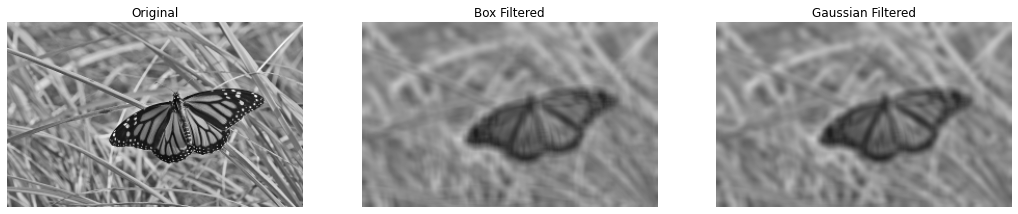

In [77]:
# Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_4).astype(np.float32)
assert img is not None

ksize=9
sigma=4
box_kernal=1./81*np.ones((9,9))
img_avg=cv.filter2D(img,-1,box_kernal)
img_gaissian=cv.GaussianBlur(img,(ksize,ksize),sigma)

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_avg,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Box Filtered')
ax[2].imshow(img_gaissian,cmap='gray',vmin=0,vmax=255)
ax[2].set_title('Gaussian Filtered')

for i in range(3):
    ax[i].axis('off')

(-1.999999999986112, 1.0)

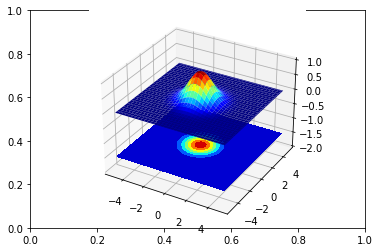

In [4]:
# Q2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline


step=0.1
sigma=1
x=np.arange(-5,5+step,step)
y=np.arange(-5,5+step,step)

XX,YY=np.meshgrid(x,y)
g=np.exp(-(XX**2+YY**2)/(2*sigma**2))

surf=ax.plot_surface(XX,YY,g,cmap=cm.jet)
cset=ax.contourf(XX,YY,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))


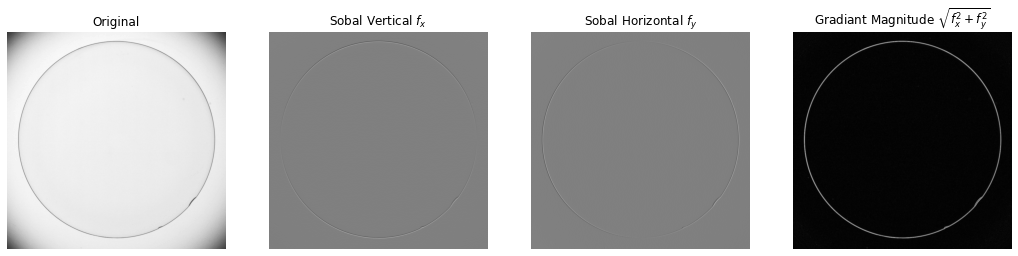

In [84]:
# Q3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'contact_lens.tif',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_verticle=np.array([(-1,-2,-1),(0,0,0),(1,2,1)] ,dtype= 'float')
sobel_horizontal=np.array([(-1,0,1),(-2,0,2),(-1,0,1)] ,dtype= 'float')

img_vert_x = cv.filter2D(img,-1,sobel_verticle)
img_horiz_y = cv.filter2D(img,-1,sobel_horizontal)
grad_mag=np.sqrt(img_vert_x**2+img_horiz_y**2)

fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')

ax[1].imshow(img_vert_x,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title(r'Sobal Vertical $f_x$')

ax[2].imshow(img_horiz_y,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title(r'Sobal Horizontal $f_y$')

ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title(r'Gradiant Magnitude $\sqrt{f^2_x+f^2_y}$')

for i in range(4):
    ax[i].axis('off')

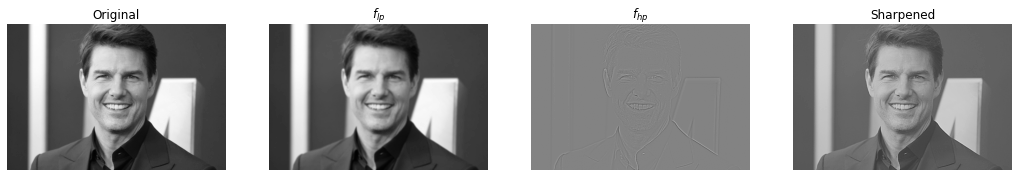

In [79]:
# Q4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv.imread(r'tom.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma=5
gaussian_id=cv.getGaussianKernel(5,sigma)
img_lp=cv.sepFilter2D(img,-1,gaussian_id,gaussian_id)
img_hp=img-img_lp
img_sharpen=cv.addWeighted(img,1.0,img_hp,1.5,0)

fig,ax=plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(img_lp,cmap='gray')
ax[1].set_title(r'$f_{lp}$')

ax[2].imshow(img_hp,cmap='gray')
ax[2].set_title(r'$f_{hp}$')

ax[3].imshow(img_sharpen,cmap='gray')
ax[3].set_title(r'Sharpened')

for i in range(4):
    ax[i].axis('off')